In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [2]:
sns.set_theme(rc={"figure.figsize": (16, 4)})

In [3]:
df = pd.read_csv('../data/sp500/csv/AAPL.csv', parse_dates=['Date'], date_format='%d-%m-%Y', index_col=0)
df['RateOfReturn'] = (df['Close'] - df['Close'].shift(1))/df['Close'].shift(1)
df

,Low,Open,Volume,High,Close,Adjusted Close,RateOfReturn
Date,,,,,,,
1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874,NaN
1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094663,-0.052171
1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087715,-0.073398
1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.089886,0.024751
1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092492,0.028992
...,...,...,...,...,...,...,...
2022-12-06,141.919998,147.070007,64727200,147.300003,142.910004,142.910004,-0.025370
2022-12-07,140.000000,142.190002,69721100,143.369995,140.940002,140.940002,-0.013785
2022-12-08,141.100006,142.360001,62128300,143.520004,142.649994,142.649994,0.012133


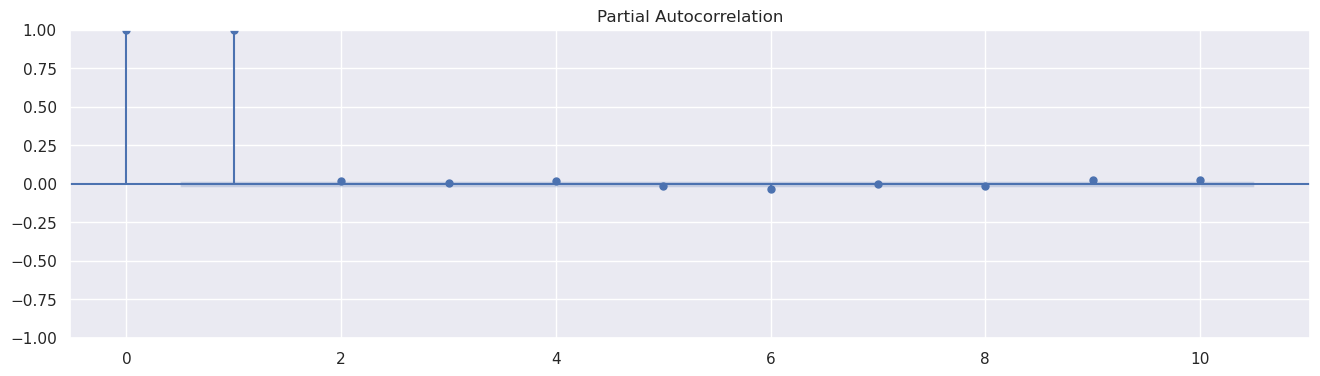

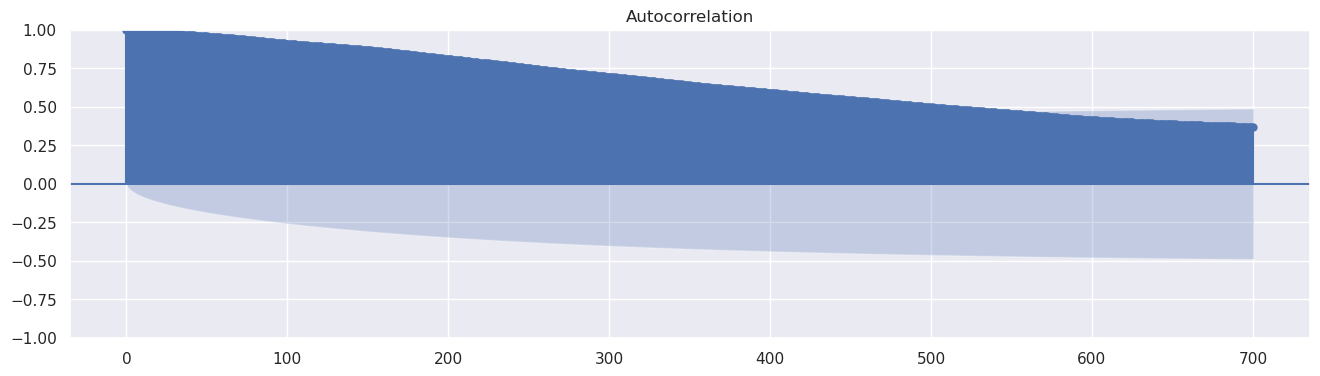

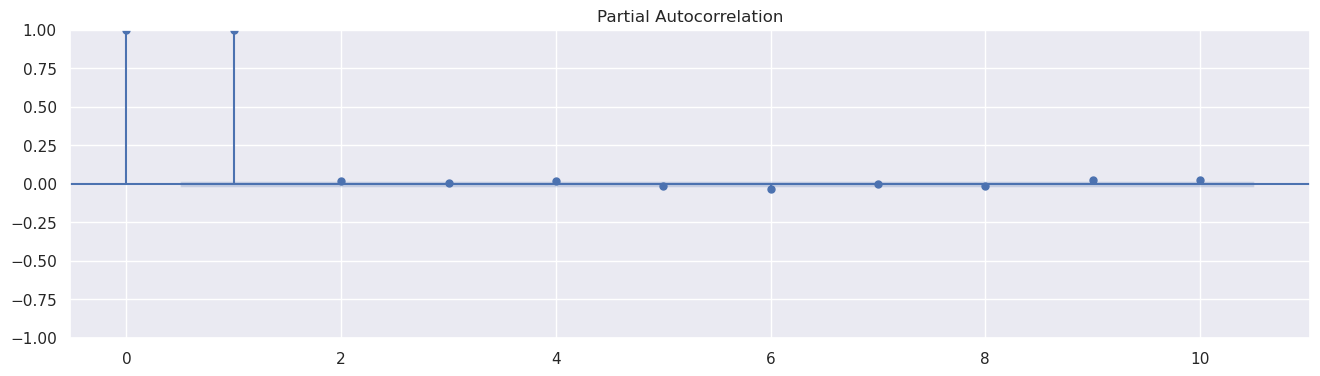

In [4]:
sm.graphics.tsa.plot_acf(df['Close'].values, lags=700)
sm.graphics.tsa.plot_pacf(df['Close'].values, lags=10)


In [5]:
df_w = df.resample('W').mean()
df_w

,Low,Open,Volume,High,Close,Adjusted Close,RateOfReturn
Date,,,,,,,
1980-12-14,0.128348,0.128348,469033600.0,0.128906,0.128348,0.099874,NaN
1980-12-21,0.118973,0.119196,98026880.0,0.119531,0.118973,0.092579,-0.002159
1980-12-28,0.143415,0.143415,46972800.0,0.143973,0.143415,0.111598,0.058951
1981-01-04,0.155971,0.156250,54863200.0,0.156669,0.155971,0.121369,-0.006925
1981-01-11,0.141964,0.142411,39580800.0,0.142522,0.141964,0.110469,-0.015069
...,...,...,...,...,...,...,...
2022-11-20,147.879996,149.812000,76535940.0,151.583997,149.823996,149.823996,0.002161
2022-11-27,147.777496,149.012501,51006375.0,150.375000,149.342499,149.342499,-0.005172
2022-12-04,143.308002,145.000000,80181200.0,147.460001,145.907999,145.907999,-0.000060


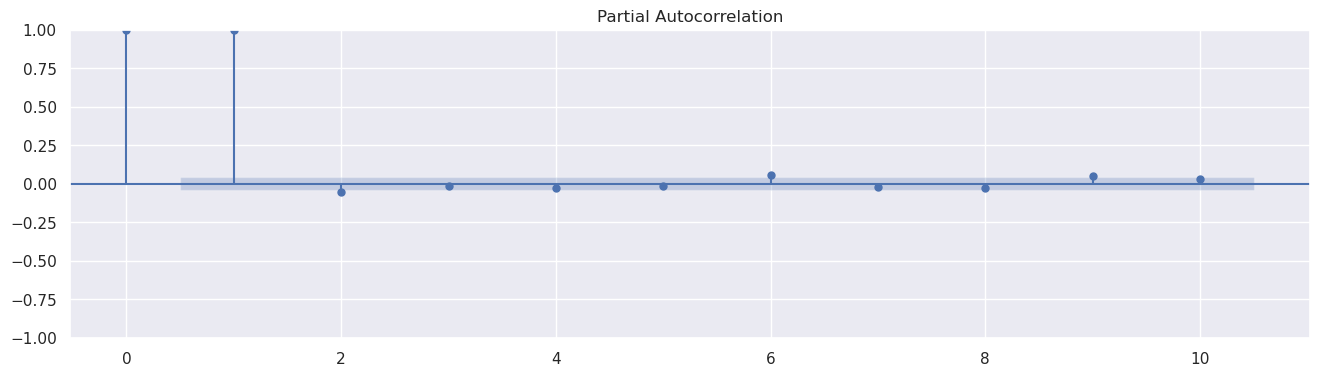

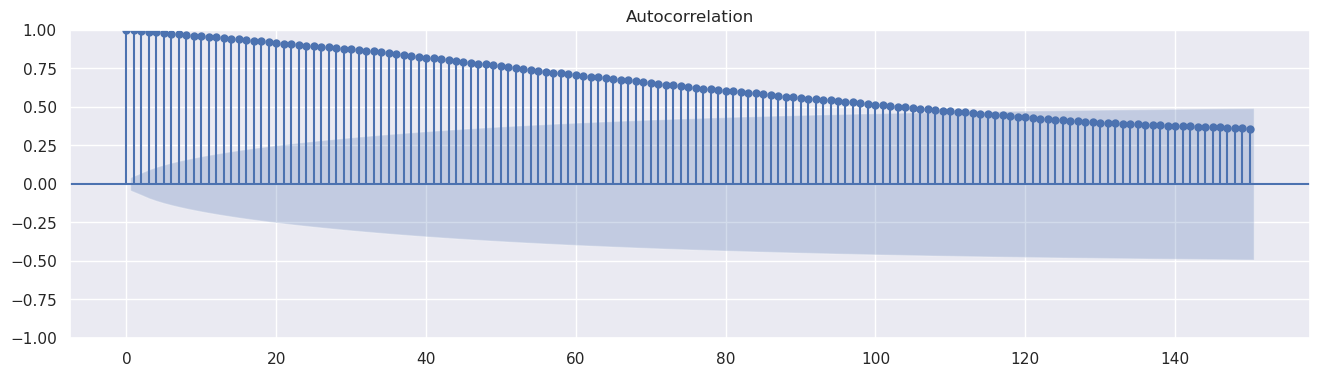

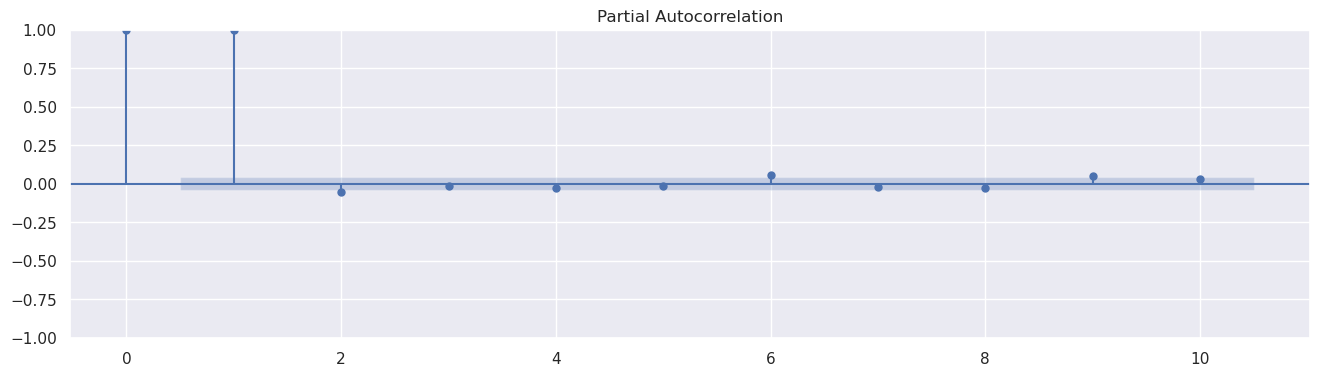

In [6]:
sm.graphics.tsa.plot_acf(df_w['Close'].values, lags=150)
sm.graphics.tsa.plot_pacf(df_w['Close'].values, lags=10)

In [7]:
model = sm.tsa.ARIMA(df_w['Close'], order=(10,1,1), freq='W')

In [10]:
res = model.fit(low_memory=True)

In [11]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2193
Model:                ARIMA(10, 1, 1)   Log Likelihood               -3558.265
Date:                Sun, 06 Oct 2024   AIC                           7140.529
Time:                        15:08:25   BIC                           7208.840
Sample:                    12-14-1980   HQIC                          7165.495
                         - 12-18-2022                                         
Covariance Type:               approx                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2098      0.505      0.416      0.677      -0.779       1.199
ar.L2         -0.0656      0.139     -0.472      0.637      -0.338       0.207
ar.L3          0.0129      0.047      0.273      0.785      -0.080       0.106
ar.L4          0.0837      0.024      3.537      0.000       0.037       0.130
ar.L5         -0.0747      0.047     -1.586      0.113      -0.167       0.018
ar.L6         -0.0124      0.046     -0.268      0.789      -0.103       0.078
ar.L7          0.0067      0.022      0.300      0.764      -0.037       0.051
ar.L8         -0.0842      0.023     -3.728      0.000      -0.129      -0.040
ar.L9         -0.0220      0.048     -0.455      0.649      -0.117       0.073
ar.L10         0.0065      0.023      0.282      0.778      -0.039       0.052
ma.L1          0.0627      0.504      0.124      0.901      -0.925       1.051
sigma2         1.5047      0.045     33.106      0.000       1.416       1.594
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            148786.54
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):           19005.29   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        43.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""